In [ ]:
pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.5 MB/s eta 0:00:00


In [52]:
import matplotlib.pyplot as plt
import random
import numpy as np
from deap import base, creator, tools, algorithms

In [131]:
num_locations = 10
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50,50) #location of the depot
num_vehicles = 3

In [132]:
print(locations)

[(69, 70), (16, 55), (41, 19), (40, 99), (10, 68), (19, 64), (0, 20), (6, 36), (75, 68), (93, 77)]


In [133]:
creator.create("FitnessMin", base.Fitness , weights = (-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [134]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [135]:
#SOLUTION CODE


#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [136]:
toolbox.register("mate", tools.cxPartialyMatched )
toolbox.register("mutate",tools.mutShuffleIndexes , indpb=0.05)
toolbox.register("select",tools.selRoulette)

In [137]:
# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	329.249	1.08251
1  	230   	326.731	1.15248
2  	232   	326.636	1.56649
3  	217   	325.603	1.56649
4  	216   	325.568	2.46098
5  	222   	325.575	2.48345
6  	218   	330.735	2.48345
7  	219   	332.527	2.68653
8  	219   	332.158	2.68653
9  	219   	331.641	1.38856
10 	217   	331.55 	1.38856
11 	234   	330.602	2.95108
12 	217   	330.67 	4.66386
13 	251   	330.449	1.7318 
14 	229   	326.329	3.43363
15 	240   	329.752	1.88267
16 	215   	330.95 	3.71885
17 	208   	328.171	3.32431
18 	237   	330.292	3.32431
19 	252   	326.149	4.31179
20 	218   	328.637	4.3361 
21 	243   	330.912	4.3361 
22 	229   	327.653	5.20526
23 	219   	332.173	2.29987
24 	215   	330.142	2.9852 
25 	224   	328.052	3.30571
26 	217   	329.504	3.66664
27 	240   	329.828	3.31464
28 	228   	330.067	4.86208
29 	217   	330.675	3.15398
30 	219   	332.726	4.60284
31 	238   	334.714	1.19214
32 	222   	333.107	0.928136
33 	213   	330.022	1.6268  
34 	229   	334.567	1.01773 
35 	239   	333.252	1.7251

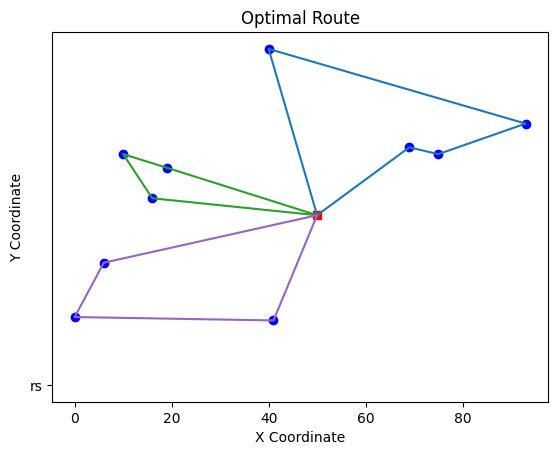

In [138]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()